## COVID - 19 UNITED STATE

Saya mencoba melakukan analisis ringan tentang covid-19 di Usa, untuk sumber data saya mengambilnya dari https://www.kaggle.com/datasets/fireballbyedimyrnmom/us-counties-covid-19-dataset/data

# Importing the required libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [234]:
## pd.set_option("display.max_rows" , None)

# Data Preparation

In [235]:
data = pd.read_csv("us-counties.csv")
data.shape

(2502832, 6)

In [236]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [237]:
# memilih variable yang berguna untuk di analisys
data.drop("fips" , axis="columns" , inplace=True)

In [238]:
# melihat banyak-nya nilai null di datasets
data.isna().sum()

date          0
county        0
state         0
cases         0
deaths    57605
dtype: int64

In [239]:
# menghapus data null dari datasets
data = data.dropna()

In [240]:
# memeriksa lagi untuk memastikan apakah sudah terhapus nilai nulll nya
data.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [241]:
# merubah tipe data date , deaths , dan cases
data["date"] = pd.to_datetime(data["date"]).dt.date
data["deaths"] = data["deaths"].astype(int)
data["cases"] = data["cases"].astype(int)

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445227 entries, 0 to 2502831
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   county  object
 2   state   object
 3   cases   int64 
 4   deaths  int64 
dtypes: int64(2), object(3)
memory usage: 111.9+ MB


In [243]:
data.describe()

,cases,deaths
count,2.445227e+06,2.445227e+06
mean,1.021409e+04,1.616100e+02
std,4.806184e+04,8.203335e+02
min,0.000000e+00,0.000000e+00
25%,3.830000e+02,6.000000e+00
50%,1.803000e+03,3.300000e+01
75%,6.008000e+03,1.010000e+02
max,2.908425e+06,4.026700e+04


In [244]:
data.shape

(2445227, 5)

# Data Analysis

In [245]:
# menghitung semua total cases dan deaths yang ada di US

# mencari total semua kasus dengan mengambil semua kasus di hari terakhir karena data
# ini cases dan deaths nya cumulative lalu menambahkan semuanya dari berbagai state dan county

last_date = datetime.strptime('2022-05-13', "%Y-%m-%d").date()
total_cases_in_us = data[data["date"] == last_date]["cases"].sum()

start_date = data["date"].min()
end_date = data["date"].max()

print(f"total cases confirmed on us from {start_date} till {end_date} is : {total_cases_in_us}")
total_deaths_in_us = data[data["date"] == last_date]["deaths"].sum()
print(f"total cases confirmed on us from {start_date} till {end_date} is : {total_deaths_in_us}")

total cases confirmed on us from 2020-01-21 till 2022-05-13 is : 81761031
total cases confirmed on us from 2020-01-21 till 2022-05-13 is : 998279


In [246]:
# membuat dataframe yang berisi jumlah cases dan deaths dari setiap state
state = []
cases = []
deaths = []

for i in data["state"].unique():
  temp = data[data["state"] == i]
  group_c = temp.groupby("county")["cases"].max().to_frame()
  group_d = temp.groupby("county")["deaths"].max().to_frame()

  summ_c = group_c["cases"].sum()
  summ_d = group_d["deaths"].sum()

  state.append(i)
  cases.append(summ_c)
  deaths.append(summ_d)


stats_state_table = pd.DataFrame({"state" : state , "cases" : cases , "deaths" : deaths})
# dan membuat column baru  dengan rumus 100 * deaths / cases
stats_state_table["death rates ( per 100 ) "] = np.round((100 * stats_state_table["deaths"] )/ stats_state_table["cases"] , 2)

stats_state_table.set_index("state" , inplace=True)
stats_state_table.sort_values("cases" , ascending=False , inplace=True)
stats_state_table.style.background_gradient(cmap="Blues" , subset =["cases"]).background_gradient(cmap="Reds" , subset=["deaths"]).background_gradient(cmap="Oranges" , subset=["death rates ( per 100 ) "])


,cases,deaths,death rates ( per 100 )
state,,,
California,9386668,90999,0.970000
Texas,6813923,88448,1.300000
Florida,6329181,85864,1.360000
New York,5267378,69108,1.310000
Illinois,3227145,38018,1.180000
Pennsylvania,2850361,44816,1.570000
Ohio,2725342,38572,1.420000
North Carolina,2694970,24618,0.910000
Georgia,2497983,36748,1.470000


KESIMPULAN TABEL 1

1.   kasus covid - 19 terbanyak terdapat pada negara bagian  california dengan 9.386.668 kasus

2.  kematian covid - 19 terbanyak terdapat pada negara bagian  california dengan 90.999 kasus

3.  rates kematiang per 100 case paling tinggi berada di negara bagian Puerto Rico dengan rates setinggi 20.180000

In [247]:
stats_county_table = data.groupby(["county"])[["cases" , "deaths"]].max().sort_values("cases" , ascending=False)

stats_county_table["death rates ( per 100 ) "] = np.round((100 * stats_county_table["deaths"] )/ stats_county_table["cases"] , 2)
stats_county_table.style.background_gradient(cmap="Blues" , subset=["cases"]).background_gradient(cmap="Reds" , subset=["deaths"]).background_gradient(cmap="Oranges" , subset=["death rates ( per 100 ) "])

,cases,deaths,death rates ( per 100 )
county,,,
Los Angeles,2908425,32022,1.100000
New York City,2422658,40267,1.660000
Maricopa,1283590,17326,1.350000
Miami-Dade,1209302,10921,0.900000
Cook,1193914,14936,1.250000
Harris,1032781,10972,1.060000
San Diego,824586,5271,0.640000
Riverside,626695,6527,1.040000
Broward,614436,5852,0.950000


KESIMPULAN TABEL 2

1.   kasus covid - 19 terbanyak terdapat pada kabupaten / kota  Los Angles dengan 2.908.425 kasus

2.  kematian covid - 19 terbanyak terdapat pada kabupaten / kota New York City dengan 40.267 kasus

3.  rates kematiang per 100 case paling tinggi berada di kabupaten / kota MCMullen dengan rates setinggi 5.330000

In [252]:
stats_state_county_table = data.groupby(["state","county"])[["cases" , "deaths"]].max().sort_values("cases" , ascending=False)

stats_state_county_table["death rates ( per 100 ) "] = np.round((100 * stats_state_county_table["deaths"] )/ stats_state_county_table["cases"] , 2)

stats_state_county_table.style.background_gradient(cmap="Blues" , subset=["cases"]).background_gradient(cmap="Reds" , subset=["deaths"]).background_gradient(cmap="Oranges" , subset=["death rates ( per 100 ) "])

KESIMPULAN TABLE 3

1. kasus covid-19 tebanyak berada di negara bagian califoria dengan kabupaten / kota Los Angles dengan 2.908.425 kasus

2. kasus kematian covid-19 terbanyak berada di negara bagian New York dengan kabupaten / kota New York City dengan 40.267 kasus

3. rates kematian tertinggi terbanyak ada di negara bagian Hawai dengan kabupaten / kota yang tidak di ketahui yaitu sebesar 75.0 rates

# VISUALIZATION barplot

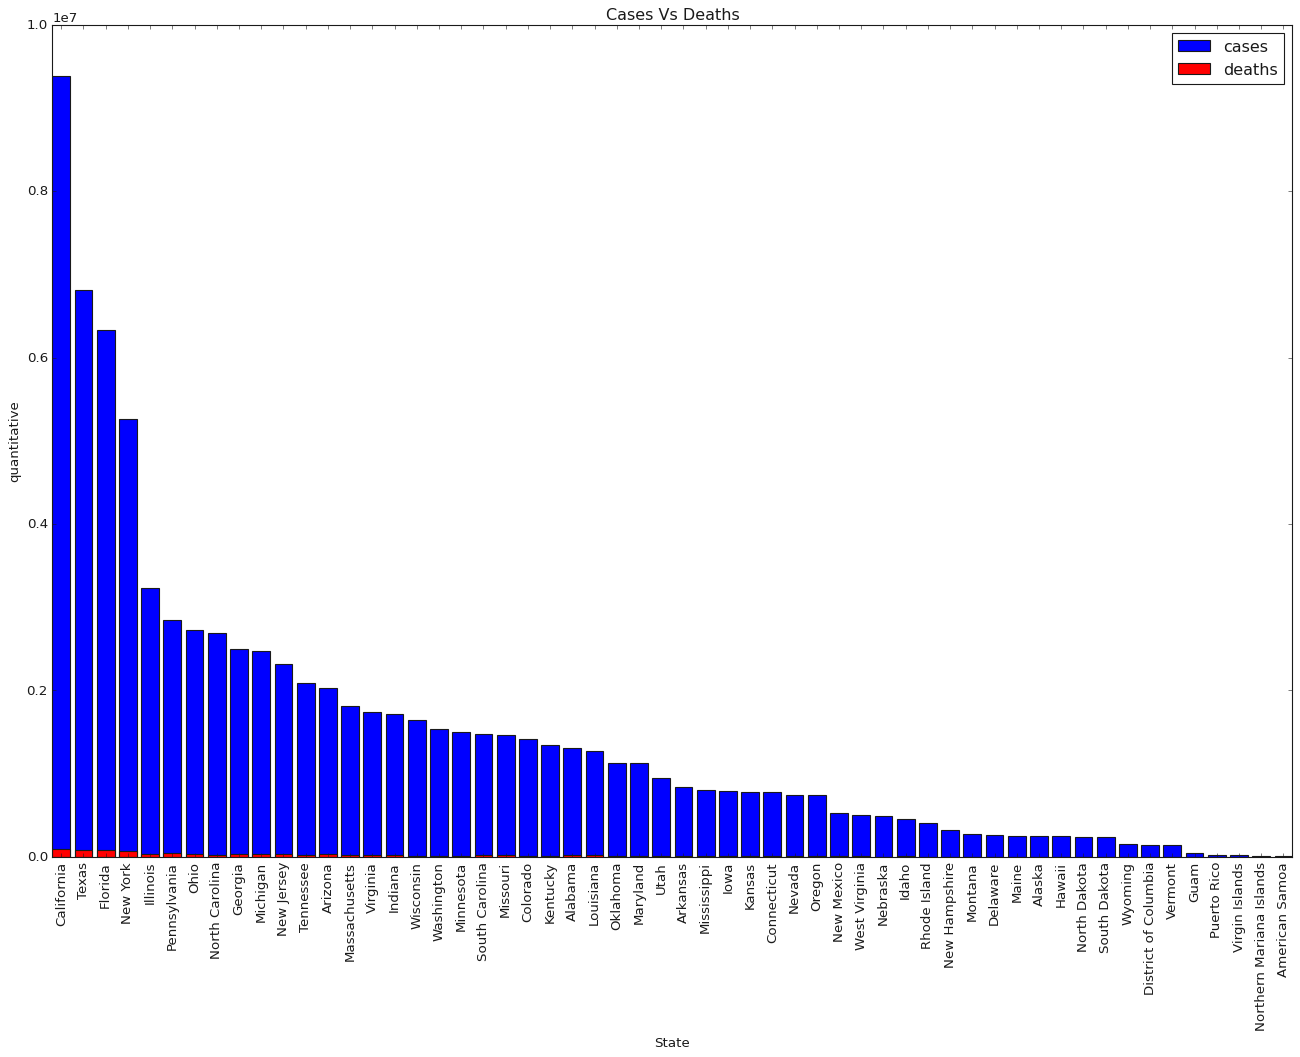

In [249]:
# membuat barplot untuk membandingkan jumlah dates dan cases di setiap state atau negara bagian
plt.figure(figsize=(20,13))
plt.style.use('classic')


plt.bar(stats_state_table.index , stats_state_table["cases"] , label="cases" , color="blue")
plt.bar(stats_state_table.index , stats_state_table["deaths"] ,label="deaths" , color='red')

plt.title("Cases Vs Deaths")
plt.xlabel("State")
plt.ylabel("quantitative")
plt.legend()
plt.xticks(rotation=90)
plt.show()



# Visualization lineplot

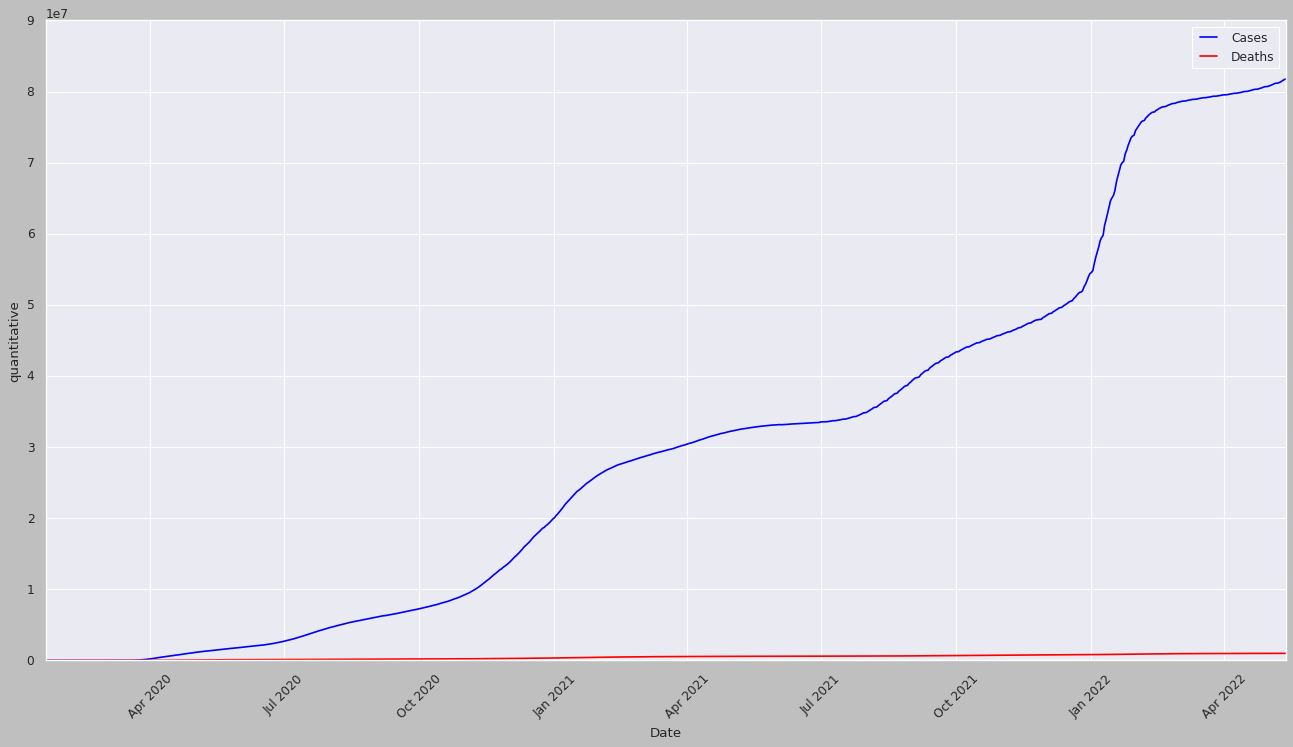

In [250]:
# membandingkan deaths dan cases dengan lineplot untuk setiap tanggal

# menambahkan semua kasus dan kematian  di setiap tanggal
cases_time = data.groupby("date")["cases"].sum().to_frame()
deaths_time= data.groupby("date")["deaths"].sum().to_frame()

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

sns.lineplot(data=cases_time , x="date" , y="cases" , color="Blue" , label="Cases")
sns.lineplot(data=deaths_time , x="date" , y="deaths" , color="Red" , label="Deaths")

plt.xlabel("Date")
plt.ylabel("quantitative")
plt.legend()
plt.xticks(rotation=45)
plt.show()
